# Principal Component Analysis

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [42]:
data = np.loadtxt("data/fisher_iris_shuffled.txt")

In [43]:
data[:5]

array([[6.8, 3.2, 5.9],
       [5.5, 2.6, 4.4],
       [5.7, 2.6, 3.5],
       [6.1, 2.6, 5.6],
       [6.5, 2.8, 4.6]])

### center and standardize data:

In [44]:
def center_standardize(data):
    """
    Takes array as input and centers and 
    standardizes each column.
    """
    data = (data-data.mean(axis=0))/data.std(axis=0)
    return data

In [45]:
standard_data = center_standardize(data)

In [46]:
standard_data[:10]

array([[ 1.15917263,  0.33784833,  1.21768427],
       [-0.41600969, -1.05056946,  0.36469871],
       [-0.17367395, -1.05056946, -0.14709262],
       [ 0.31099753, -1.05056946,  1.04708716],
       [ 0.79566902, -0.58776353,  0.47843012],
       [ 0.4321654 , -0.58776353,  0.59216153],
       [-1.14301691,  0.10644536, -1.2844067 ],
       [-0.29484182, -0.1249576 ,  0.42156442],
       [ 1.2803405 ,  0.10644536,  0.64902723],
       [-0.41600969, -1.74477836,  0.1372359 ]])

### Covariance matrix across features

In [47]:
def covariance_matrix(data):
    """
    Computes covariance matrix for an array
    where columns represent the variables
    with observations in the rows.
    """
    A = data
    N = A.shape[0]
    a = A - (np.dot((np.ones(shape=(N, N))), A)/N)
    cov_mat = np.dot(a.T, a)/N
    
    return cov_mat

In [48]:
covariance_matrix = covariance_matrix(standard_data)
covariance_matrix

array([[ 1.        , -0.10936925,  0.87175416],
       [-0.10936925,  1.        , -0.4205161 ],
       [ 0.87175416, -0.4205161 ,  1.        ]])

### Principal Components as the eigenvectors of the covariance matrix

In [49]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [50]:
eigenvectors

array([[-0.63137983,  0.64685642,  0.42771052],
       [ 0.35424227, -0.25005463,  0.90110216],
       [-0.6898347 , -0.72045087,  0.07126444]])

In [51]:
eigenvalues

array([2.01382631, 0.07134297, 0.91483072])

**Notes for Eigenvalues**<p>
- In general, Eigenvalues indicate how much variance is in the data in a specific direction, the direction of the respective Eigenvector, large Eigenvalues indicate that the respective component (eigenvector) holds more variance. 
- Eigenvectors which hold the largest variance are the best components for PCA, therefore, the Eigenvalues can be used to create a ranking of the Components. 
- Small eigenvalues close to zero don't add much information, so their components might be discardable. 
- The component with the largest Eigenvalue is the principal component.

### Rank components

In [52]:
# sort the eigenvectors by eigenvalues (descending)
eigenvectors = eigenvectors[eigenvalues.argsort()[::-1]]

In [53]:
eigenvectors

array([[-0.63137983,  0.64685642,  0.42771052],
       [-0.6898347 , -0.72045087,  0.07126444],
       [ 0.35424227, -0.25005463,  0.90110216]])

In [54]:
# also sort the eigenvalues to keep a consistent order
eigenvalues = eigenvalues[eigenvalues.argsort()[::-1]]

In [55]:
eigenvalues

array([2.01382631, 0.91483072, 0.07134297])

In [56]:
normalized_eigenvalues = eigenvalues / eigenvalues.sum()
normalized_eigenvalues

array([0.67127544, 0.30494357, 0.02378099])

### Projection

A projection matrix consists of two eigenvectors (two components)

In [57]:
projection_matrix1 = eigenvectors[[0,1],:] # PC1 and PC2
projection_matrix2 = eigenvectors[[0,2],:] # PC1 and PC3
projection_matrix3 = eigenvectors[[1,2],:] # PC2 and PC3

In [58]:
# Projection:
# matrix multiplication of data with transposed projection matrix
x_projection1 = np.dot(standard_data, projection_matrix1.T)
x_projection2 = np.dot(standard_data, projection_matrix2.T)
x_projection3 = np.dot(standard_data, projection_matrix3.T)

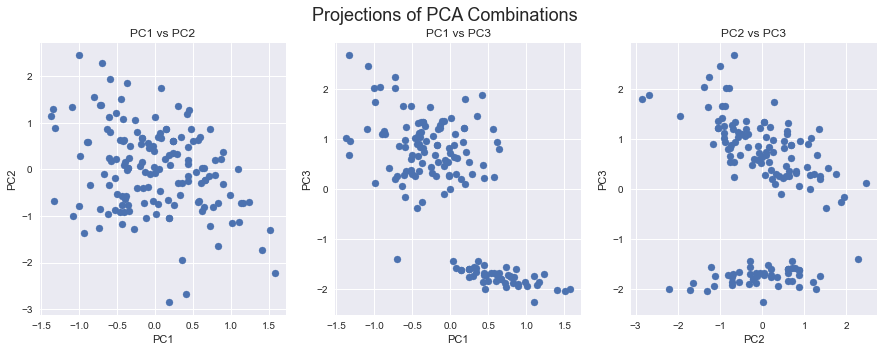

In [59]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# select the respective columns of the projected data for the PCs
x1,y1 = x_projection1[:,0], x_projection1[:,1] # PC1 and PC2
x2,y2 = x_projection2[:,0], x_projection2[:,1] # PC1 and PC3
x3,y3 = x_projection3[:,0], x_projection3[:,1] # PC2 and PC3

ax[0].scatter(x1,y1)
ax[1].scatter(x2,y2)
ax[2].scatter(x3,y3)

ax[0].title.set_text('PC1 vs PC2')
ax[1].title.set_text('PC1 vs PC3')
ax[2].title.set_text('PC2 vs PC3')

ax[0].set(xlabel='PC1',ylabel='PC2')
ax[1].set(xlabel='PC1',ylabel='PC3')
ax[2].set(xlabel='PC2',ylabel='PC3')

fig.suptitle('Projections of PCA Combinations', fontsize=18)
plt.show()

- Through the projection, the data was reduced from three dimensions to two dimensions -> dimensionality reductuion.
- The scatter plots show a linear combination of the original dataset features and the respective principal components used.